# Loading UCI data for car efficiency given different factors

In [69]:
import pandas as pd 
import scipy 
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [70]:
auto_mpg = fetch_ucirepo(id=9) 


In [71]:
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  

In [72]:
print(X.shape)

(398, 7)


In [73]:
# variable information 
print(auto_mpg.variables) 

           name     role         type  ... description units missing_values
0  displacement  Feature   Continuous  ...        None  None             no
1           mpg   Target   Continuous  ...        None  None             no
2     cylinders  Feature      Integer  ...        None  None             no
3    horsepower  Feature   Continuous  ...        None  None            yes
4        weight  Feature   Continuous  ...        None  None             no
5  acceleration  Feature   Continuous  ...        None  None             no
6    model_year  Feature      Integer  ...        None  None             no
7        origin  Feature      Integer  ...        None  None             no
8      car_name       ID  Categorical  ...        None  None             no

[9 rows x 7 columns]


## Visualizing and cleaning up the data

In [74]:
X.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [75]:
y.describe()

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


In [76]:
consolidated_data = pd.merge(X,y, left_index=True,right_index=True)
consolidated_data

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


In [77]:
#how much data are we missing we should take two views a row view and a column view:

#column view of the data we are missing 

for col in consolidated_data.columns:
    col_series = consolidated_data[col]
    col_length = col_series.shape[0]
    undefined = sum(col_series.isna())
    print(f"Percent of {col} values NaN = {undefined/col_length:.3f}%")





Percent of displacement values NaN = 0.000%
Percent of cylinders values NaN = 0.000%
Percent of horsepower values NaN = 0.015%
Percent of weight values NaN = 0.000%
Percent of acceleration values NaN = 0.000%
Percent of model_year values NaN = 0.000%
Percent of origin values NaN = 0.000%
Percent of mpg values NaN = 0.000%


In [78]:
# row view of data we are missing
ill_defined = 0

for index, row in consolidated_data.iterrows():
    length = row.shape[0]
    undefined = sum(row.isna())
    if undefined:
        ill_defined+=1

print(f"Percent of rows with at least one value missing = {ill_defined/consolidated_data.shape[0]:.2f}")
    


Percent of rows with at least one value missing = 0.02


### Clearly the amount of missing values we have is minimal we don't have to do any kind of crazy imputation we can keep working here

In [79]:
#clearly there were some rows that had undefined values as you can see the number of rows dropped to 392
#perhaps there were MPGs that were undefined 
consolidated_data = consolidated_data.dropna(how='any', axis=0)
consolidated_data

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


## Let's visualize all the data to get a sense of their distributions

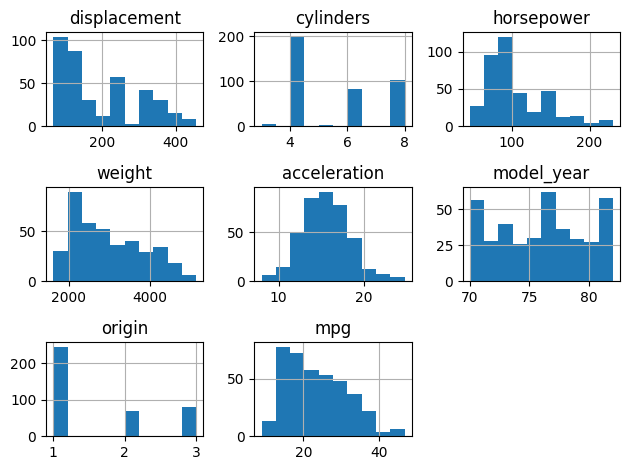

In [ ]:
#clearly we have cylinders, origing and model year as categorical variables 
#all the distributions seem to be left tailed makes sense for there to be less car makes for large cars than small ones
consolidated_data.hist()
plt.tight_layout()


In [81]:
#certainly no extreme values of y that we have to drop remove for our regression, that's ok then we can get to further analyzing our data